## Analisis de Datos -  Tarea 1: Limpieza y Estructura de Datos
### Integrantes

    - César Godoy Delaigue 
    - Cristhian Alejandro Solís

DataSet pérdidas de tiempo en las redes sociales:

El conjunto de datos "Pérdidas de tiempo en las redes sociales" ofrece una visión detallada del comportamiento y la interacción de los usuarios con las plataformas de redes sociales. Captura varios atributos que pueden ayudar a analizar el impacto de las redes sociales en el tiempo y la productividad de los usuarios. Para este ejercicio valioso para investigar y comprender los matices del consumo de las redes sociales.

Este conjunto de datos se generó utilizando técnicas de datos sintéticos con la ayuda de NumPy y pandas. Los datos se crearon artificialmente para simular patrones de uso de redes sociales del mundo real con fines de investigación y análisis.

## Descripción de Columnas:

* UserID: Un identificador único asignado a cada usuario.
* Edad: La edad del usuario.
* Género: El género del usuario.
* Ubicación: La ubicación geográfica del usuario.
* Ingresos: Los ingresos anuales del usuario.
* Deuda: Indica si el usuario está endeudado o no.
* Posee propiedad: Indica si el usuario posee alguna propiedad (Sí/No).
* Profesión: La profesión o puesto de trabajo del usuario.
* Demografía: Información demográfica adicional sobre el usuario (Vida rural o urbana).
* Plataforma: La plataforma de redes sociales utilizada por el usuario (por ejemplo, Facebook, Instagram, TikTok).
* Tiempo total dedicado: El tiempo total que el usuario ha pasado en la plataforma.
* Número de sesiones: El número de sesiones que el usuario ha tenido en la plataforma.
* ID de video: Un identificador único para cada video visto.
* Categoría de video: La categoría del video visto (por ejemplo, Entretenimiento, Juegos, Bromas, Vlog).
* Duración del video: La duración del video visto.
* Participación: El nivel de participación del usuario con el video (por ejemplo, Me gusta, Comentarios).
* Puntuación de importancia: una puntuación que representa la importancia percibida del video para el usuario.
* Tiempo dedicado al video: la cantidad de tiempo que el usuario pasó viendo el video.
* Número de videos vistos: la cantidad total de videos vistos por el usuario.
* Velocidad de desplazamiento: la velocidad a la que el usuario se desplaza por el contenido.
* Frecuencia: la frecuencia con la que el usuario inicia sesión en la plataforma.
* Pérdida de productividad: la cantidad de productividad perdida debido al tiempo dedicado a las redes sociales.
* Satisfacción: el nivel de satisfacción del usuario con el contenido consumido.
* Motivo de visualización: el motivo por el que el usuario vio el video (por ejemplo, entretenimiento, información).
* Tipo de dispositivo: el tipo de dispositivo utilizado para acceder a la plataforma (por ejemplo, móvil, escritorio).
* Sistema operativo: el sistema operativo del dispositivo utilizado.
* Hora de visualización: la hora específica del día en la que el usuario vio el video.
* Autocontrol: el nivel de autocontrol autoevaluado por
* el usuario mientras usa la plataforma. Nivel de adicción: el nivel de adicción a las redes sociales autoevaluado por el usuario.
* Actividad actual: la actividad en la que participaba el usuario antes de usar la plataforma.
* ConnectionType: El tipo de conexión a Internet utilizada por el usuario (por ejemplo, Wi-Fi, datos móviles).

Se importan librerias   
- Sklearn; donde se extrae el dataset a utilizar, algoritmos de machine learning, métricas y preprocesamiento. 
- Pandas y numpy para trabajos con DF
- Matplotlib para graficar
- Seaborn para visualizaciones especificas

In [32]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from plotnine import ggplot, aes, geom_histogram, theme_bw, labs

In [33]:
# Load the dataset
file_path = ("..\Data\Time-Wasters on Social Media.csv")
df_redes_sociales = pd.read_csv(file_path)

print(df_redes_sociales.head())

   UserID  Age  Gender       Location  Income   Debt  Owns Property  \
0       1   56    Male       Pakistan   82812   True           True   
1       2   46  Female         Mexico   27999  False           True   
2       3   32  Female  United States   42436  False           True   
3       4   60    Male         Barzil   62963   True          False   
4       5   25    Male       Pakistan   22096  False           True   

      Profession Demographics   Platform  ...  ProductivityLoss  Satisfaction  \
0       Engineer        Rural  Instagram  ...                 3             7   
1         Artist        Urban  Instagram  ...                 5             5   
2       Engineer        Rural   Facebook  ...                 6             4   
3  Waiting staff        Rural    YouTube  ...                 3             7   
4        Manager        Urban     TikTok  ...                 8             2   

      Watch Reason  DeviceType       OS  Watch Time  Self Control  \
0  Procrastinatio

## Exploración Incial de Datos

In [34]:
# mostrar la información del dataset
df_redes_sociales.head()

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


In [35]:
# mostrar tipo de datos
df_redes_sociales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   UserID                    1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   object
 3   Location                  1000 non-null   object
 4   Income                    1000 non-null   int64 
 5   Debt                      1000 non-null   bool  
 6   Owns Property             1000 non-null   bool  
 7   Profession                1000 non-null   object
 8   Demographics              1000 non-null   object
 9   Platform                  1000 non-null   object
 10  Total Time Spent          1000 non-null   int64 
 11  Number of Sessions        1000 non-null   int64 
 12  Video ID                  1000 non-null   int64 
 13  Video Category            1000 non-null   object
 14  Video Length             

In [36]:
# mostrar cantidad de observaciones y variables
df_redes_sociales.shape

(1000, 31)

In [37]:
# Mostrar las columnas de tipo numericas
numeric_columns = df_redes_sociales.select_dtypes(include=['int64', 'float64']).columns
print(numeric_columns)

Index(['UserID', 'Age', 'Income', 'Total Time Spent', 'Number of Sessions',
       'Video ID', 'Video Length', 'Engagement', 'Importance Score',
       'Time Spent On Video', 'Number of Videos Watched', 'Scroll Rate',
       'ProductivityLoss', 'Satisfaction', 'Self Control', 'Addiction Level'],
      dtype='object')


In [38]:
# Mostrar las columnas de tipo categoricas
categorical_columns = df_redes_sociales.select_dtypes(include=['object']).columns
print(categorical_columns)     

Index(['Gender', 'Location', 'Profession', 'Demographics', 'Platform',
       'Video Category', 'Frequency', 'Watch Reason', 'DeviceType', 'OS',
       'Watch Time', 'CurrentActivity', 'ConnectionType'],
      dtype='object')


In [39]:
# Resumen estadistico
df_redes_sociales.describe()

,UserID,Age,Income,Total Time Spent,Number of Sessions,Video ID,Video Length,Engagement,Importance Score,Time Spent On Video,Number of Videos Watched,Scroll Rate,ProductivityLoss,Satisfaction,Self Control,Addiction Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.986000,59524.213000,151.406000,10.013000,4891.738000,15.214000,4997.159000,5.129000,14.973000,25.248000,49.774000,5.136000,4.864000,7.094000,2.906000
std,288.819436,13.497852,23736.212925,83.952637,5.380314,2853.144258,8.224953,2910.053701,2.582834,8.200092,14.029159,29.197798,2.122265,2.122265,2.058495,2.058495
min,1.000000,18.000000,20138.000000,10.000000,1.000000,11.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,250.750000,29.000000,38675.250000,78.000000,6.000000,2542.000000,8.000000,2415.750000,3.000000,8.000000,14.000000,23.000000,3.000000,4.000000,5.000000,2.000000
50%,500.500000,42.000000,58805.000000,152.000000,10.000000,4720.500000,15.000000,5016.000000,5.000000,15.000000,25.000000,50.000000,5.000000,5.000000,7.000000,3.000000
75%,750.250000,52.000000,79792.250000,223.000000,15.000000,7346.000000,22.000000,7540.250000,7.000000,22.000000,37.000000,74.000000,6.000000,7.000000,8.000000,5.000000
max,1000.000000,64.000000,99676.000000,298.000000,19.000000,9997.000000,29.000000,9982.000000,9.000000,29.000000,49.000000,99.000000,9.000000,9.000000,10.000000,7.000000


## Limpieza y Procesamiento de Datos

In [40]:
df_redes_sociales.isnull().sum()

UserID                      0
Age                         0
Gender                      0
Location                    0
Income                      0
Debt                        0
Owns Property               0
Profession                  0
Demographics                0
Platform                    0
Total Time Spent            0
Number of Sessions          0
Video ID                    0
Video Category              0
Video Length                0
Engagement                  0
Importance Score            0
Time Spent On Video         0
Number of Videos Watched    0
Scroll Rate                 0
Frequency                   0
ProductivityLoss            0
Satisfaction                0
Watch Reason                0
DeviceType                  0
OS                          0
Watch Time                  0
Self Control                0
Addiction Level             0
CurrentActivity             0
ConnectionType              0
dtype: int64

In [41]:
duplicates = df_redes_sociales.duplicated()
print(duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool


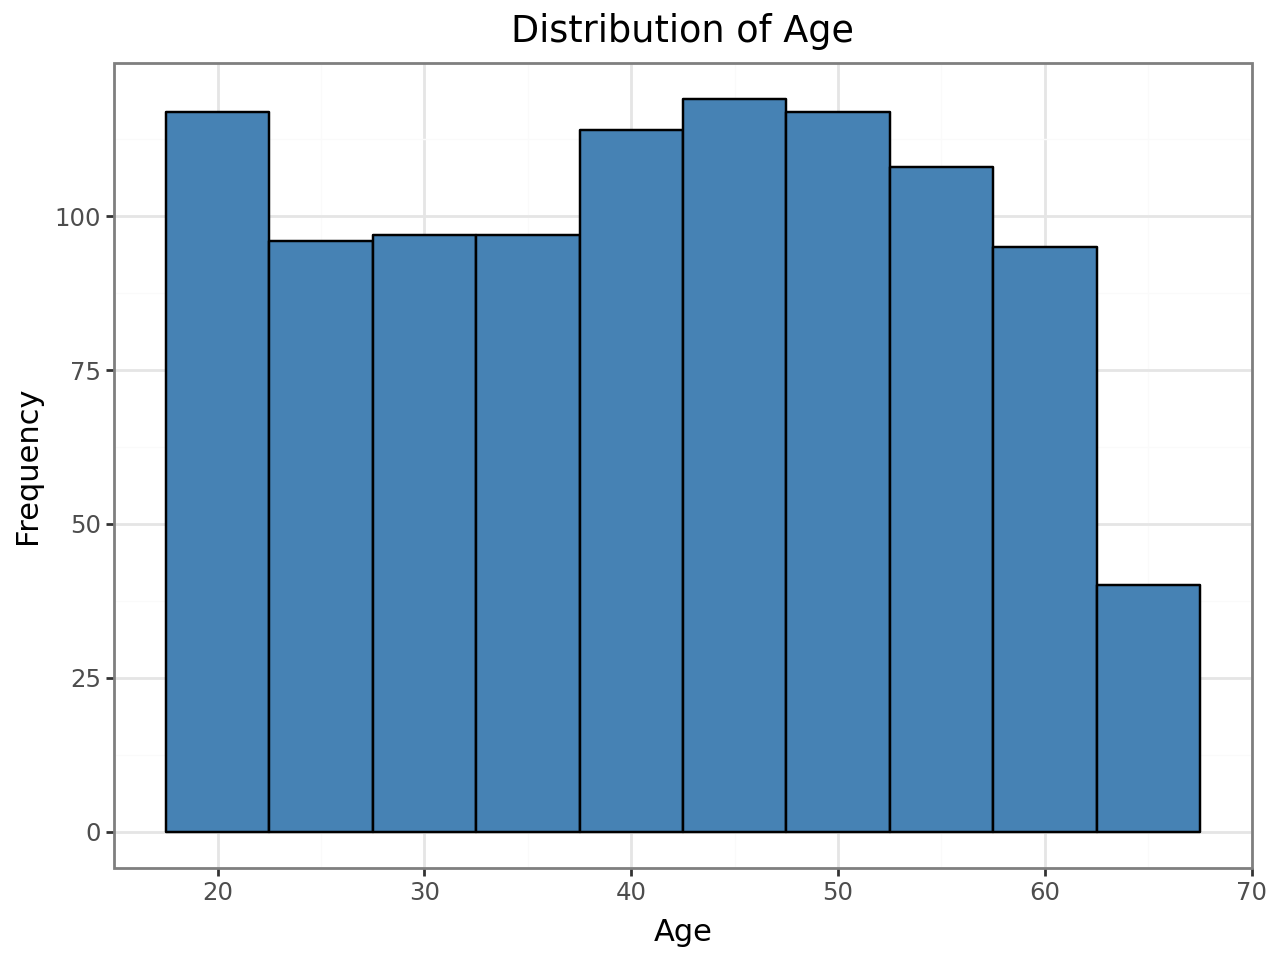

In [42]:
# Plot Distribución de la Edad
(ggplot(df_redes_sociales, aes(x='Age'))
+ geom_histogram(binwidth=5, fill='steelblue', color='black')
+ theme_bw()
+ labs(title='Distribution of Age', x='Age', y='Frequency')
)
